In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

/Users/matteoc/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
with gzip.open("hists/ZJetsToNuNu_HT-100To200_13TeV-madgraph.pkl.gz") as fin:
    hists = pickle.load(fin)

In [9]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "recoil")
process_map = OrderedDict()
#process_map["Hcc"] = ("GluGluHToCC", 2)
#process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Z+jets"] = ("ZJets*", 1)
#process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
#process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
#process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
#process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
#process_map["Top"] = ("TTTo*", slice(None))
#process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)

ValueError: Reducing along axis <Bin (name=recoil) instance at 0x11ee37908>: requested start 1 exceeds bin boundaries (use open slicing, e.g. x[:stop])

<IPython.core.display.Javascript object>


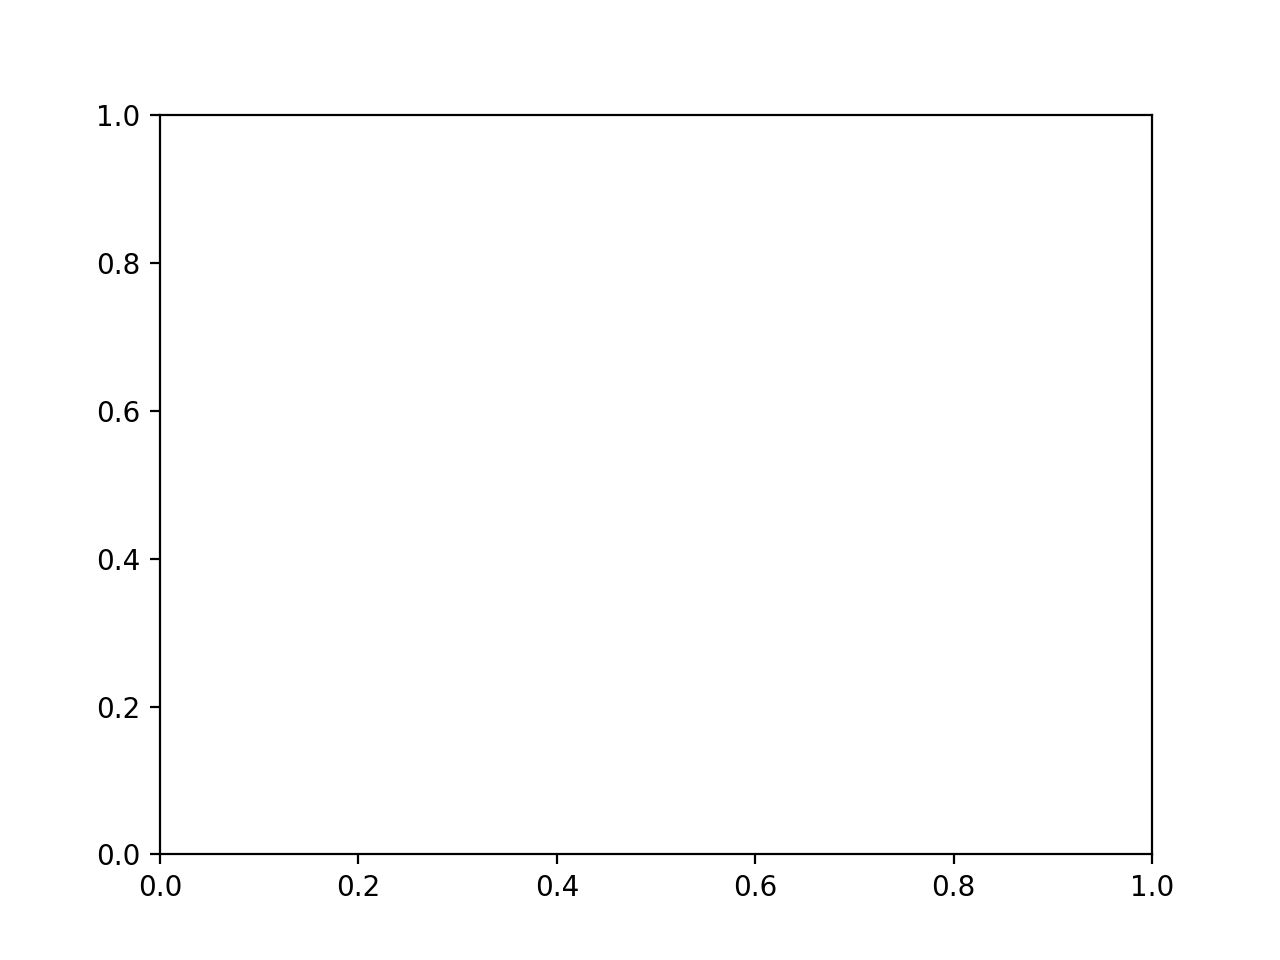

KeyError: 'No axis process found in <Hist (dataset,recoil) instance at 0x106296a20>'

In [8]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
fig, ax, _ = plot.plot1d(hists['recoil'], overlay="process", stack=True, fill_opts=fill_opts)
ax.set_yscale('log')
ax.set_ylim(.1,None)

In [10]:
nbins = sum(sum(arr.size for arr in h._sumw.values()) for h in hists.values())
nfilled = sum(sum(np.sum(arr>0) for arr in h._sumw.values()) for h in hists.values())
print("Now %.1fM bins" % (nbins/1e6, ))
print("Nonzero bins: %.1f%%" % (100*nfilled/nbins, ))

Now 0.0M bins
Nonzero bins: 4.2%
